## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
#on colab
!nvidia-smi

Sun Sep 29 11:41:12 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import os
import keras
from sklearn import preprocessing
from keras import backend as K

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255
    if flatten:
      x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y
    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [35]:
"""Code Here
建立你的神經網路
"""
def build_mlp(img_shape, output_dim = 10, neurons = [512, 256, 128, 64, 32, 16, 8]):
    K.clear_session()
    model = keras.models.Sequential()
    for i, units in enumerate(neurons):
      if i == 0:
          model.add(keras.layers.Dense(units = units, activation = 'relu', name = "hidden_layer" + str(i), input_shape = img_shape))
      else:
          model.add(keras.layers.Dense(units = units, activation = 'relu', name = "hidden_layer" + str(i)))
    model.add(keras.layers.Dense(units = output_dim, activation = 'softmax', name = "output"))
    return model
model = build_mlp(img_shape = x_train.shape[1:])              
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer4 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 16)                528       
_________________________________________________________________
hidden_layer6 (Dense)        (None, 8)              

In [0]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [0]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [38]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 154us/step - loss: 2.3024 - acc: 0.1006 - val_loss: 2.2574 - val_acc: 0.1478
Epoch 2/100
50000/50000 [==============================] - 3s 55us/step - loss: 2.1494 - acc: 0.1820 - val_loss: 2.0588 - val_acc: 0.2030
Epoch 3/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.9853 - acc: 0.2481 - val_loss: 1.9148 - val_acc: 0.2904
Epoch 4/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.8684 - acc: 0.3096 - val_loss: 1.8384 - val_acc: 0.3356
Epoch 5/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.7776 - acc: 0.3549 - val_loss: 1.7361 - val_acc: 0.3741
Epoch 6/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.7013 - acc: 0.3876 - val_loss: 1.6688 - val_acc: 0.4035
Epoch 7/100
50000/50000 [==

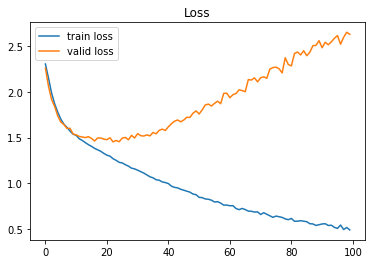

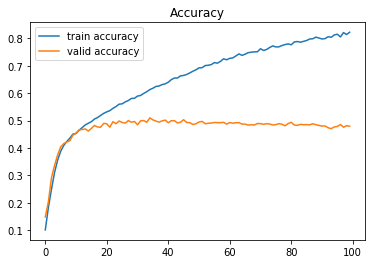

In [39]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()